In [56]:
import pandas as pd
import numpy as np
from itertools import product

%load_ext autoreload
%autoreload 2
import pipeline_functions

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
"Each dataframe should be a request for a new datapoint"
"In our pipeline functions, every time the file already exists, do nothing"
results_df = pd.DataFrame()

# Perform Splits

In [ ]:
# No need for more than 1 test split at the moment

# Create Outlier Sets

In [ ]:
# For each proportion from 0 to 0.10, create 30 outlier sets from the mammographic dataset

dataset_filenames = ["cleaned-datasets/mammographic.csv"]
outlier_methods = ["infeasExamRandomLabel"]
alphas = [10.0]
epsilons = [10.0]
outlier_proportions = np.arange(0, 0.11, 0.01)
outlier_random_states = range(30)

outlier_combinations = product(dataset_filenames, outlier_methods, alphas, epsilons, outlier_proportions, outlier_random_states)

outlier_df = pd.DataFrame(outlier_combinations, columns=["dataset_filename", "outlier_method", "alpha", "epsilon", "outlier_proportion", "outlier_random_state"])

# outlier_df["dataset_filename"] = outlier_df["dataset_filename"].astype(pd.StringDtype())
# outlier_df["outlier_method"] = outlier_df["outlier_method"].astype(pd.StringDtype())

In [ ]:
pipeline_functions.create_outlier_sets(outlier_df)
outlier_df.to_csv("cleaned-datasets/mammographic/outlier_df.csv")

In [ ]:
# Only consider 0 <= outlier_random_state < 10
truncated_outlier_df = outlier_df[(outlier_df["outlier_random_state"] >= 0) & (outlier_df["outlier_random_state"] < 10)]

In [69]:
# Import
outlier_df = pd.read_csv("cleaned-datasets/mammographic/outlier_df.csv", index_col=0)

## Visualize Outliers

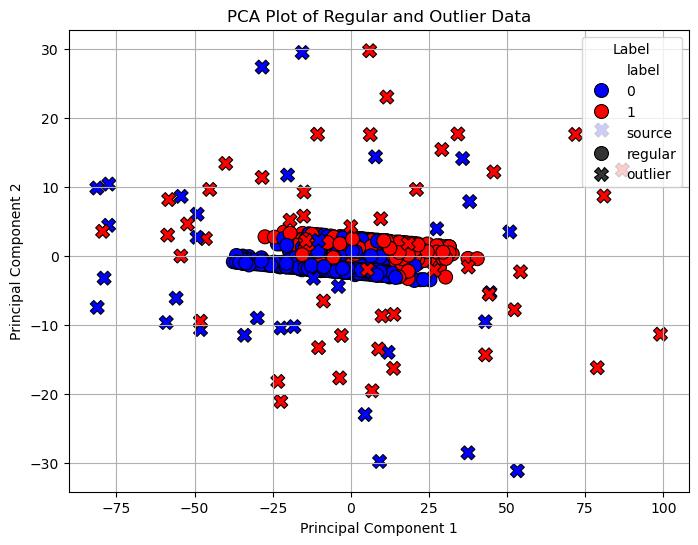

In [70]:
from sklearn.decomposition import PCA
import seaborn as sns

# Pick one with 0.10 outliers
example_row = outlier_df[outlier_df["outlier_proportion"] == 0.10].iloc[0]

example_genuine_df = pd.read_csv(example_row["dataset_filename"], index_col=0)
example_outlier_df = pd.read_csv(example_row["outlier_dataset_filename"], index_col=0)

# Add a new column to distinguish genuine from outlier
example_genuine_df['source'] = 'regular'
example_outlier_df['source'] = 'outlier'

example_df = pd.concat([example_genuine_df, example_outlier_df], axis=0)

# Extract X and y
example_X = example_df.drop(columns=['label', 'source'])
example_y = example_df['label']
example_sources = example_df['source']

# Apply PCA to reduce the features to 2 dimensions
pca = PCA(n_components=2)
example_X_pca = pca.fit_transform(example_X)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot genuine and outlier data with different markers and colors for label, using 'seaborn' color palette for the label distinction
sns.scatterplot(x=example_X_pca[:, 0], y=example_X_pca[:, 1], hue=example_y, style=example_sources, 
                palette={0: 'blue', 1: 'red'},
                markers={'regular': 'o', 'outlier': 'X'}, 
                s=100, edgecolor='k')

# Customize plot appearance
plt.title('PCA Plot of Regular and Outlier Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label', loc='upper right')
plt.grid(True)
plt.show()

# Evaluate Logistic Regression

In [ ]:
# Create by joining test and train splits with the corresponding outliers
logistic_regression_df = outlier_df.copy()

logistic_regression_df["train_dataset_filename"] = "cleaned-datasets/mammographic/train_dataset-test_proportion=0.3-random_state=0.csv"
logistic_regression_df["test_dataset_filename"] = "cleaned-datasets/mammographic/test_dataset-test_proportion=0.3-random_state=0.csv"

logistic_regression_df["classifier_type"] = "LogisticRegression"
logistic_regression_df["LogisticRegression.penalty"] = "l2"

In [30]:
pipeline_functions.evaluate_classifiers(logistic_regression_df)

In [39]:
logistic_regression_df.to_csv("cleaned-datasets/mammographic/logistic_regression_df.csv")

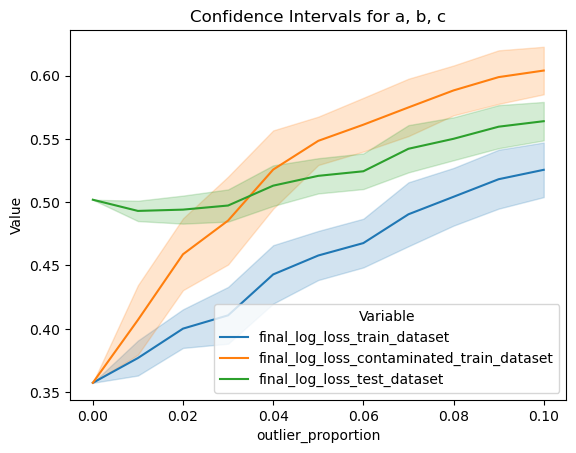

In [37]:
plot_confidence_intervals(logistic_regression_df, ['final_log_loss_train_dataset', 'final_log_loss_contaminated_train_dataset', 'final_log_loss_test_dataset'])

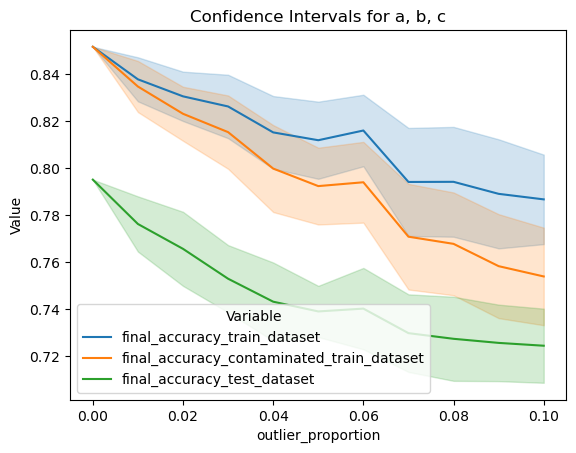

In [38]:
plot_confidence_intervals(logistic_regression_df, ['final_accuracy_train_dataset', 'final_accuracy_contaminated_train_dataset', 'final_accuracy_test_dataset'])

# Evaluate Gradient Trees

In [144]:
# First, let's try only the default set of parameters

GBDT_df = outlier_df.copy()

GBDT_df["train_dataset_filename"] = "cleaned-datasets/mammographic/train_dataset-test_proportion=0.3-random_state=0.csv"
GBDT_df["test_dataset_filename"] = "cleaned-datasets/mammographic/test_dataset-test_proportion=0.3-random_state=0.csv"
GBDT_df["classifier_type"] = "GradientBoostingClassifier"

n_estimators = [200]
loss = ["log_loss"]
# max_depth = range(1, 3+1)       # expand to 1...6
max_depth = range(4, 5+1)
learning_rate = np.arange(0, 0.15 + 0.025, 0.025)

# dataset_filenames = ["cleaned-datasets/mammographic.csv"]
# outlier_methods = ["infeasExamRandomLabel"]
# alphas = [10.0]
# epsilons = [10.0]
# outlier_proportions = np.arange(0, 0.11, 0.01)
# outlier_random_states = range(30)

GBDT_arguments_combinations = product(n_estimators, loss, max_depth, learning_rate)
GBDT_arguments_df = pd.DataFrame(GBDT_arguments_combinations, columns=["GradientBoostingClassifier.n_estimators", "GradientBoostingClassifier.loss", "GradientBoostingClassifier.max_depth", "GradientBoostingClassifier.learning_rate"])

GBDT_df = GBDT_df.merge(GBDT_arguments_df, how="cross")

In [147]:
pipeline_functions.evaluate_classifiers(GBDT_df)

starting row 1 of 4620
starting row 2 of 4620
starting row 3 of 4620
starting row 4 of 4620
starting row 5 of 4620
starting row 6 of 4620
starting row 7 of 4620
starting row 8 of 4620
starting row 9 of 4620
starting row 10 of 4620
starting row 11 of 4620
starting row 12 of 4620
starting row 13 of 4620
starting row 14 of 4620
starting row 15 of 4620
starting row 16 of 4620
starting row 17 of 4620
starting row 18 of 4620
starting row 19 of 4620
starting row 20 of 4620
starting row 21 of 4620
starting row 22 of 4620
starting row 23 of 4620
starting row 24 of 4620
starting row 25 of 4620
starting row 26 of 4620
starting row 27 of 4620
starting row 28 of 4620
starting row 29 of 4620
starting row 30 of 4620
starting row 31 of 4620
starting row 32 of 4620
starting row 33 of 4620
starting row 34 of 4620
starting row 35 of 4620
starting row 36 of 4620
starting row 37 of 4620
starting row 38 of 4620
starting row 39 of 4620
starting row 40 of 4620
starting row 41 of 4620
starting row 42 of 4620
s

In [148]:
GBDT_df

,dataset_filename,outlier_method,alpha,epsilon,outlier_proportion,outlier_random_state,outlier_dataset_filename,train_dataset_filename,test_dataset_filename,classifier_type,...,GradientBoostingClassifier.max_depth,GradientBoostingClassifier.learning_rate,final_log_loss_train_dataset,final_log_loss_contaminated_train_dataset,final_log_loss_test_dataset,loss_data_filename,final_accuracy_train_dataset,final_accuracy_contaminated_train_dataset,final_accuracy_test_dataset,accuracy_data_filename
0,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,4,0.000,0.693094,0.693094,0.692411,cleaned-datasets/mammographic/outlier_dataset-...,0.505172,0.505172,0.538153,cleaned-datasets/mammographic/outlier_dataset-...
1,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,4,0.025,0.246159,0.246159,0.478846,cleaned-datasets/mammographic/outlier_dataset-...,0.908621,0.908621,0.799197,cleaned-datasets/mammographic/outlier_dataset-...
2,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,4,0.050,0.201693,0.201693,0.542583,cleaned-datasets/mammographic/outlier_dataset-...,0.929310,0.929310,0.787149,cleaned-datasets/mammographic/outlier_dataset-...
3,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,4,0.075,0.167386,0.167386,0.601444,cleaned-datasets/mammographic/outlier_dataset-...,0.943103,0.943103,0.787149,cleaned-datasets/mammographic/outlier_dataset-...
4,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,4,0.100,0.145992,0.145992,0.676503,cleaned-datasets/mammographic/outlier_dataset-...,0.948276,0.948276,0.775100,cleaned-datasets/mammographic/outlier_dataset-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4615,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,29,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,5,0.050,0.178688,0.159890,0.559040,cleaned-datasets/mammographic/outlier_dataset-...,0.943103,0.950151,0.779116,cleaned-datasets/mammographic/outlier_dataset-...
4616,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,29,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,5,0.075,0.135839,0.120813,0.653815,cleaned-datasets/mammographic/outlier_dataset-...,0.951724,0.957704,0.763052,cleaned-datasets/mammographic/outlier_dataset-...
4617,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,29,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,5,0.100,0.113755,0.100721,0.730417,cleaned-datasets/mammographic/outlier_dataset-...,0.953448,0.959215,0.751004,cleaned-datasets/mammographic/outlier_dataset-...
4618,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.

In [149]:
GBDT_df.to_csv("cleaned-datasets/mammographic/GBDT_df_part2.csv")

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confidence_intervals(df, value_columns):
    # Melt the dataframe to long format for easy plotting
    df_melted = df.melt(id_vars='outlier_proportion', value_vars=value_columns, var_name='Variable', value_name='Value')
    
    # Plot with seaborn's lineplot, which automatically calculates confidence intervals
    sns.lineplot(x='outlier_proportion', y='Value', hue='Variable', data=df_melted, errorbar='sd')
    
    plt.title('Confidence Intervals for a, b, c')
    plt.show()

In [110]:
GBDT_df

,dataset_filename,outlier_method,alpha,epsilon,outlier_proportion,outlier_random_state,outlier_dataset_filename,train_dataset_filename,test_dataset_filename,classifier_type,...,GradientBoostingClassifier.max_depth,GradientBoostingClassifier.learning_rate,final_log_loss_train_dataset,final_log_loss_contaminated_train_dataset,final_log_loss_test_dataset,loss_data_filename,final_accuracy_train_dataset,final_accuracy_contaminated_train_dataset,final_accuracy_test_dataset,accuracy_data_filename
0,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,1,0.000,0.693094,0.693094,0.692411,cleaned-datasets/mammographic/outlier_dataset-...,0.505172,0.505172,0.538153,cleaned-datasets/mammographic/outlier_dataset-...
1,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,1,0.025,0.345481,0.345481,0.433253,cleaned-datasets/mammographic/outlier_dataset-...,0.868966,0.868966,0.775100,cleaned-datasets/mammographic/outlier_dataset-...
2,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,1,0.050,0.330671,0.330671,0.442086,cleaned-datasets/mammographic/outlier_dataset-...,0.868966,0.868966,0.791165,cleaned-datasets/mammographic/outlier_dataset-...
3,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,1,0.075,0.326730,0.326730,0.451800,cleaned-datasets/mammographic/outlier_dataset-...,0.868966,0.868966,0.787149,cleaned-datasets/mammographic/outlier_dataset-...
4,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,1,0.100,0.324802,0.324802,0.458680,cleaned-datasets/mammographic/outlier_dataset-...,0.867241,0.867241,0.787149,cleaned-datasets/mammographic/outlier_dataset-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6925,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,29,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.050,0.299640,0.282069,0.461872,cleaned-datasets/mammographic/outlier_dataset-...,0.877586,0.892749,0.787149,cleaned-datasets/mammographic/outlier_dataset-...
6926,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,29,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.075,0.279340,0.256896,0.478904,cleaned-datasets/mammographic/outlier_dataset-...,0.887931,0.901813,0.787149,cleaned-datasets/mammographic/outlier_dataset-...
6927,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,29,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.100,0.261481,0.237211,0.494137,cleaned-datasets/mammographic/outlier_dataset-...,0.905172,0.916918,0.779116,cleaned-datasets/mammographic/outlier_dataset-...
6928,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.

In [135]:
GBDT_df[(GBDT_df["GradientBoostingClassifier.learning_rate"] >= 0.150)  & (GBDT_df["GradientBoostingClassifier.max_depth"] == 3)]

,dataset_filename,outlier_method,alpha,epsilon,outlier_proportion,outlier_random_state,outlier_dataset_filename,train_dataset_filename,test_dataset_filename,classifier_type,...,GradientBoostingClassifier.max_depth,GradientBoostingClassifier.learning_rate,final_log_loss_train_dataset,final_log_loss_contaminated_train_dataset,final_log_loss_test_dataset,loss_data_filename,final_accuracy_train_dataset,final_accuracy_contaminated_train_dataset,final_accuracy_test_dataset,accuracy_data_filename
20,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,0,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.183625,0.183625,0.599741,cleaned-datasets/mammographic/outlier_dataset-...,0.936207,0.936207,0.791165,cleaned-datasets/mammographic/outlier_dataset-...
41,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,1,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.183625,0.183625,0.598077,cleaned-datasets/mammographic/outlier_dataset-...,0.936207,0.936207,0.791165,cleaned-datasets/mammographic/outlier_dataset-...
62,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,2,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.183625,0.183625,0.603779,cleaned-datasets/mammographic/outlier_dataset-...,0.936207,0.936207,0.791165,cleaned-datasets/mammographic/outlier_dataset-...
83,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,3,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.183625,0.183625,0.599991,cleaned-datasets/mammographic/outlier_dataset-...,0.936207,0.936207,0.791165,cleaned-datasets/mammographic/outlier_dataset-...
104,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.0,4,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.183625,0.183625,0.605439,cleaned-datasets/mammographic/outlier_dataset-...,0.936207,0.936207,0.791165,cleaned-datasets/mammographic/outlier_dataset-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6845,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,25,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.238927,0.213225,0.534300,cleaned-datasets/mammographic/outlier_dataset-...,0.913793,0.924471,0.767068,cleaned-datasets/mammographic/outlier_dataset-...
6866,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,26,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.227229,0.202074,0.528454,cleaned-datasets/mammographic/outlier_dataset-...,0.917241,0.927492,0.783133,cleaned-datasets/mammographic/outlier_dataset-...
6887,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,0.1,27,cleaned-datasets/mammographic/outlier_dataset-...,cleaned-datasets/mammographic/train_dataset-te...,cleaned-datasets/mammographic/test_dataset-tes...,GradientBoostingClassifier,...,3,0.15,0.236519,0.211233,0.525998,cleaned-datasets/mammographic/outlier_dataset-...,0.906897,0.918429,0.775100,cleaned-datasets/mammographic/outlier_dataset-...
6908,cleaned-datasets/mammographic.csv,infeasExamRandomLabel,10.0,10.0,

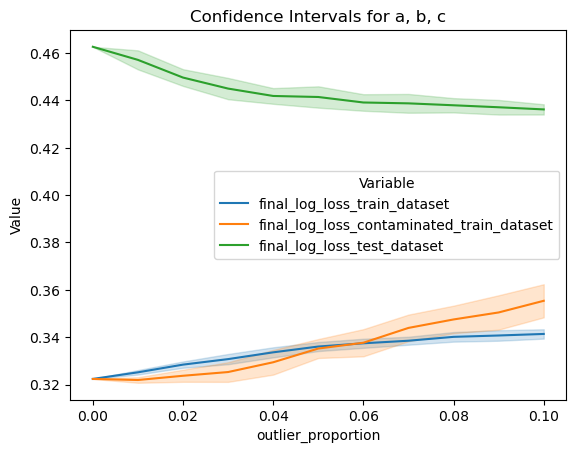

In [136]:
# use "approximately equal to" rather than exactly .150 and etc.
plot_confidence_intervals(GBDT_df[(GBDT_df["GradientBoostingClassifier.learning_rate"] >= 0.150) & (GBDT_df["GradientBoostingClassifier.max_depth"] == 1)], ['final_log_loss_train_dataset', 'final_log_loss_contaminated_train_dataset', 'final_log_loss_test_dataset'])

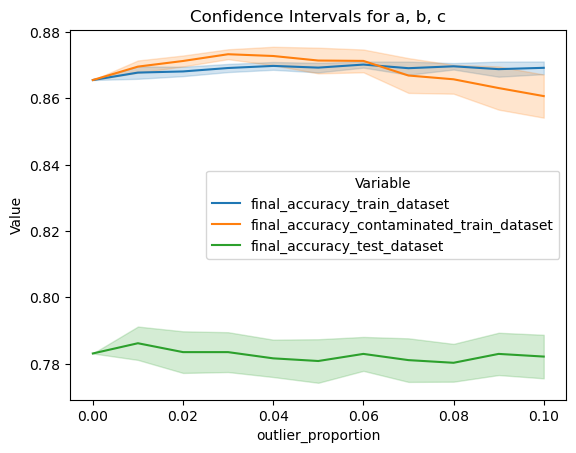

In [137]:
plot_confidence_intervals(GBDT_df[(GBDT_df["GradientBoostingClassifier.learning_rate"] >= 0.150) & (GBDT_df["GradientBoostingClassifier.max_depth"] == 1)], ['final_accuracy_train_dataset', 'final_accuracy_contaminated_train_dataset', 'final_accuracy_test_dataset'])

In [74]:
example_loss_df

,log_loss_train_dataset,log_loss_contaminated_train_dataset,log_loss_test_dataset
0,0.639334,0.644098,0.646256
1,0.594641,0.603356,0.609462
2,0.557335,0.569175,0.579286
3,0.527159,0.540765,0.553772
4,0.500750,0.516471,0.533280
...,...,...,...
95,0.301114,0.283452,0.458378
96,0.301072,0.283363,0.458458
97,0.301021,0.283124,0.458476
98,0.300960,0.282647,0.458899


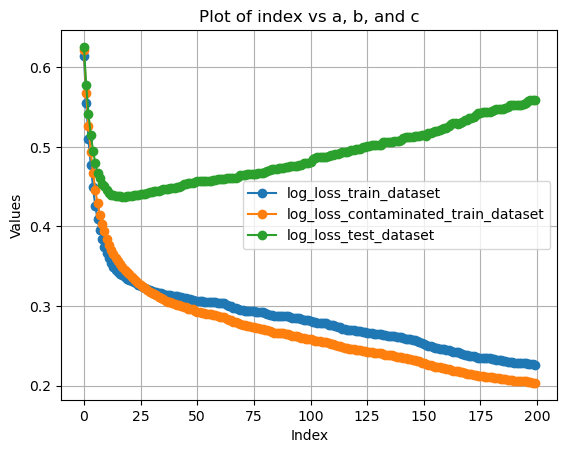

In [138]:
example_loss_df = pd.read_csv(GBDT_df.iloc[-1]["loss_data_filename"], index_col = 0)

# Plot using pandas' built-in plotting capabilities
example_loss_df.plot(y=['log_loss_train_dataset', 'log_loss_contaminated_train_dataset', 'log_loss_test_dataset'], kind='line', marker='o')

# Show the plot
plt.title('Plot of index vs a, b, and c')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend(['log_loss_train_dataset', 'log_loss_contaminated_train_dataset', 'log_loss_test_dataset'])
plt.grid(True)
plt.show()

In [39]:
# ex_df = pd.read_csv(df["outlier_dataset_filename"].iloc[0], index_col = 0)
ex_train_df = pd.read_csv(df["train_dataset_filename"].iloc[0], index_col = 0)
ex_outlier_df = pd.read_csv(df["outlier_dataset_filename"].iloc[0], index_col = 0).astype(ex1_df.dtypes.to_dict())
ex_contaminated_df = pd.concat([ex_train_df, ex_outlier_df], axis=0, ignore_index=True)

ex_test_df = pd.read_csv(df["test_dataset_filename"].iloc[0], index_col = 0)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


# clf = LogisticRegression()
clf = GradientBoostingClassifier()

clf.fit(pipeline_functions.get_X(ex_contaminated_df), pipeline_functions.get_y(ex_contaminated_df))

GradientBoostingClassifier()

In [40]:
clf.score(ex_test_df.drop("label", axis=1), ex_test_df["label"])

0.7751004016064257

In [ ]:
clf.score(ex3_df.drop("label", axis=1), ex3_df["label"])

LogisticRegression()

In [84]:
from sklearn.metrics import log_loss

log_loss(pipeline_functions.get_y(ex_df), clf.predict_proba(pipeline_functions.get_X(ex_df)))

0.6384978697903688

In [85]:
clf.predict_proba(pipeline_functions.get_X(ex_df))

array([[0.33057983, 0.66942017],
       [0.23010016, 0.76989984],
       [0.3243119 , 0.6756881 ],
       [0.46518899, 0.53481101],
       [0.52757397, 0.47242603],
       [0.61719351, 0.38280649],
       [0.25636378, 0.74363622],
       [0.21357941, 0.78642059],
       [0.39244179, 0.60755821],
       [0.3691495 , 0.6308505 ],
       [0.54103326, 0.45896674],
       [0.28890211, 0.71109789],
       [0.42731681, 0.57268319],
       [0.3897995 , 0.6102005 ],
       [0.38983573, 0.61016427],
       [0.38219279, 0.61780721],
       [0.39612995, 0.60387005],
       [0.31582512, 0.68417488],
       [0.58975943, 0.41024057],
       [0.29401404, 0.70598596],
       [0.49249771, 0.50750229],
       [0.25017504, 0.74982496],
       [0.3217524 , 0.6782476 ],
       [0.42060059, 0.57939941],
       [0.35785084, 0.64214916],
       [0.34750213, 0.65249787],
       [0.39012557, 0.60987443],
       [0.59067357, 0.40932643],
       [0.29174629, 0.70825371],
       [0.27226729, 0.72773271],
       [0.

In [86]:
clf.score(*pipeline_functions.get_X_y(ex_df))

0.6341463414634146

In [18]:
for i, row in df.iterrows():
    print(row.keys())

Index(['dataset_filename', 'test_proportion', 'dataset_split_random_state',
       'outlier_method', 'alpha', 'epsilon', 'outlier_proportion',
       'outlier_random_state', 'classifier_type',
       'LogisticRegression.penalty'],
      dtype='object')


In [21]:
a1, a2, a3 = [1 + k for k in range(3)]